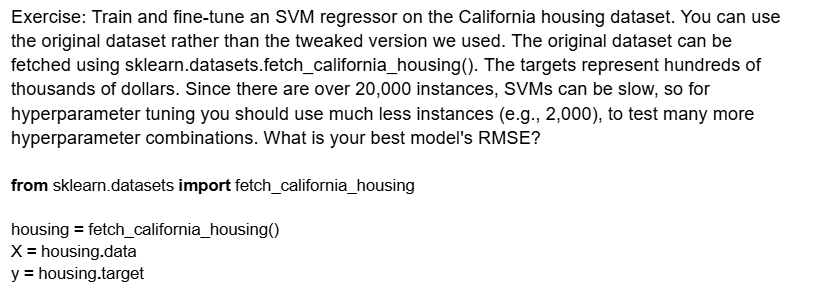

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# Load dataset
housing = fetch_california_housing()
X = housing.data[:2000]
y = housing.target[:2000]

# Standardize the data


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaledd, y, test_size=0.2)
X_scaled_train = StandardScaler().fit_transform(X_train)
X_scaled_test = StandardScaler().transform(X_test)
# Define the model
model = SVR()

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1],
    'epsilon': [0.01, 0.1],
    'kernel': ['linear', 'rbf']
}

# Apply GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Best parameters: {grid_search.best_params_}")
print(f"RMSE: {rmse}")


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters: {'C': 1, 'epsilon': 0.01, 'kernel': 'rbf'}
RMSE: 0.41500224617116627


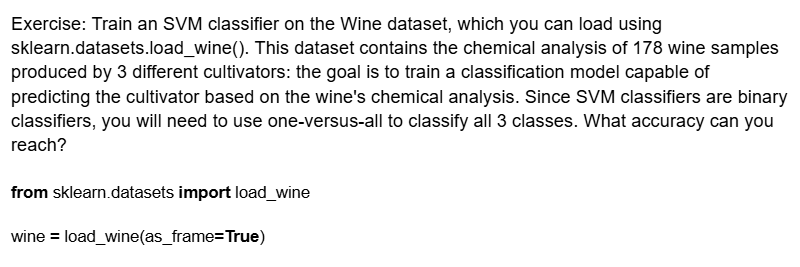

In [ ]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Wine datasetini yükləyirik
wine = load_wine(as_frame=True)
scaler = StandardScaler()
df = wine.frame
X_scaled = scaler.fit_transform(df.drop(columns=['target']))

print(df.head())
print(df.info())

X_train,X_test,y_train,y_test = train_test_split(X_scaled,df['target'],test_size = 0.2,random_state =42)
model = SVC(kernel = 'rbf',C = 1.0)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Model deqiqliyi:",accuracy_score(y_test,y_pred))

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

7Train a LinearSVC on a linearly separable dataset. Then train an SVC and a SGDClassifier on the same dataset. See if you can get them to produce roughly the same model.

In [ ]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.svm import LinearSVC  # Import LinearSVC for classification
from sklearn.linear_model import SGDRegressor  # Import SGDRegressor for regression


iris = datasets.load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]
svm_clf = SVC(kernel = 'linear',C = 1e100) #c boyudukce kucenin eni o qeder azalir
svm_clf.fit(X,y)
print(svm_clf.score(X,y))



1.0


In [ ]:
from sklearn.preprocessing import StandardScaler
iris = datasets.load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# Verilənləri standartlaşdırmaq tövsiyə olunur, çünki SGD fərqli ölçülü xüsusiyyətlərə həssasdır
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# SGDRegressor modeli
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, alpha=1e-4, penalty=None)
sgd_reg.fit(X_scaled, y)

# Modelin skorunu çap edirik (R² dəyəri)
print(sgd_reg.score(X_scaled, y))

0.938471035631215


In [ ]:
iris = datasets.load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]
svm_clf = LinearSVC(C=1e100, max_iter=10000)  # C dəyəri artırıldıqca margin daralır
svm_clf.fit(X, y)

print(svm_clf.score(X, y))


6
What is the point of using the kernel trick?
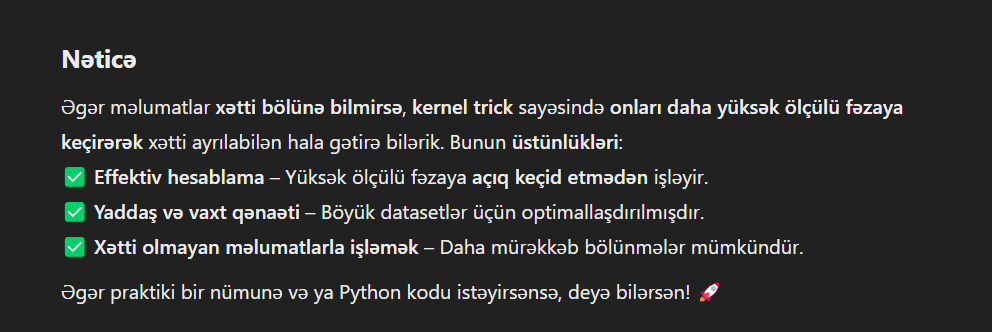

5
Say you’ve trained an SVM classifier with an RBF kernel, but it seems to underfit the training set. Should you increase or decrease γ (gamma)? What about C?
gamma ve c ikisini de artir

4How can you choose between LinearSVC, SVC, and SGDClassifier?
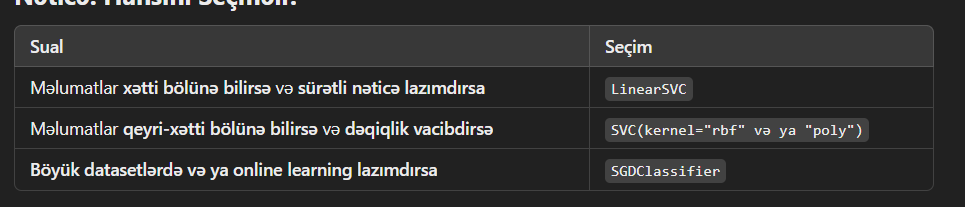

3
Why is it important to scale the inputs when using SVMs?
cunki scalingden sonra data daha yaxsi paylanir

2What is a support vector?
iki dataset arasindaki serhedd deyerleri teyin edir

1*What is the fundamental idea behind support vector machines?
**support vektorlar arasindaki hyparameter**


Linear SVM Classification

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.svm import SVC

In [ ]:
iris = datasets.load_iris(as_frame =True)
X = iris.data[["petal length (cm)","petal width (cm)"]].values
y = iris.target

In [ ]:
setosa_or_verticolor = (y == 0) | (y == 1)
X = X[setosa_or_verticolor]
y = y[setosa_or_verticolor]

In [ ]:
#SVM Classifier model
svm_clf = SVC(kernel = 'linear',C = 1e100) #c boyudukce kucenin eni o qeder azalir
svm_clf.fit(X,y)

SVC(C=1e+100, kernel='linear')

In [ ]:
svm_clf.score(X,y)

1.0

In [ ]:
def plot_svc_decision_boundary(svm_clf,xmin,xmax):
  w = svm_clf.coef_[0]
  b = svm_clf.intercept_[0]

  #At the decision boundary, w0*x0 + w1*x1 +b = 0
  # -> x1 =-w0/w1 * x- - b/w1
  x0 = np.linspace(xmin,xmax,200)
  decision_boundary = -w[0] / w[1] * x0 - b/w[1]


  margin = 1/w[1]
  gutter_up = decision_boundary + margin
  gutter_down = decision_boundary - margin
  svs = svm_clf.support_vectors_

  plt.plot(x0,decision_boundary,'k-',linewidth = 2,zorder = -2)
  plt.plot(x0,gutter_up,'k--',linewidth = 2,zorder = -2)
  plt.plot(x0,gutter_down,'k--',linewidth = 2,zorder = -2)
  plt.scatter(svs[:,0],svs[:,1], s=180,facecolors = '#AAA',zorder = -1)

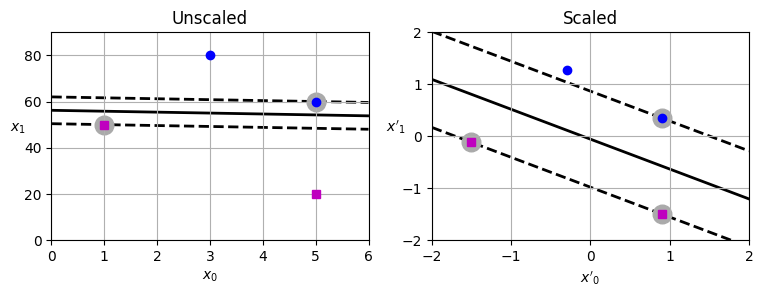

In [ ]:
from sklearn.preprocessing import StandardScaler

Xs = np.array([[1,50],[5,20],[3,80],[5,60]]).astype(np.float64)
ys = np.array([0,0,1,1])
svm_clf = SVC(kernel = 'linear',C=100).fit(Xs,ys)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf_scaled = SVC(kernel = 'linear',C=100).fit(X_scaled,ys)

plt.figure(figsize = (9,2.7))
plt.subplot(121)
plt.plot(Xs[:,0][ys == 1],Xs[:,1][ys == 1], 'bo')
plt.plot(Xs[:,0][ys == 0],Xs[:,1][ys == 0], 'ms')
plot_svc_decision_boundary(svm_clf,0,6)
plt.xlabel('$x_0$')
plt.ylabel('$x_1$ ',rotation = 0)
plt.title('Unscaled')
plt.axis([0,6,0,90])
plt.grid()

plt.subplot(122)
plt.plot(X_scaled[:,0][ys == 1],X_scaled[:,1][ys == 1], 'bo')
plt.plot(X_scaled[:,0][ys == 0],X_scaled[:,1][ys == 0], 'ms')
plot_svc_decision_boundary(svm_clf_scaled,-2,2)
plt.xlabel("$x'_0$")
plt.ylabel("$x'_1$ ",rotation = 0)
plt.title('Scaled')
plt.axis([-2,2,-2,2])
plt.grid()

plt.show()

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = load_iris(as_frame = True)
X = iris.data[["petal length (cm)","petal width (cm)"]].values
y = (iris.target == 2)   # iris virginica

svm_clf = make_pipeline(StandardScaler(),
                        LinearSVC(C = 1,random_state = 42))
svm_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=42))])

In [ ]:
svm_clf.score(X,y)

0.96

In [ ]:
X_new = [[5.5,1.7],[5.,1.5]]
svm_clf.predict(X_new)

array([ True, False])

In [ ]:
svm_clf.decision_function(X_new) # predict proba

array([ 0.66163816, -0.22035761])

The lower we set 'C', the wider the street, so we reduce overfitting

Nonlinear SVM Classification

(-4.5, 4.5, -1.0, 17.0)

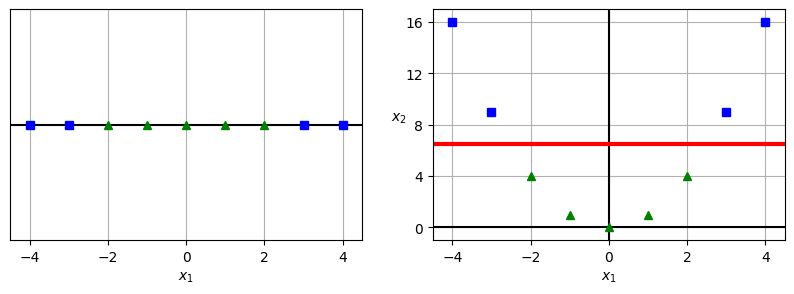

In [ ]:
X1D = np.linspace(-4,4,9).reshape(-1,1)
X2D = np.c_[X1D,X1D**2]      # c -> concatenate demekdi
y = np.array([0,0,1,1,1,1,1,0,0])

plt.figure(figsize = (10,3))

plt.subplot(121)
plt.grid(True)
plt.axhline(y = 0,color = 'k')
plt.plot(X1D[:,0][y == 0],np.zeros(4),'bs')
plt.plot(X1D[:,0][y == 1],np.zeros(5),'g^')
plt.gca().get_yaxis().set_ticks([])
plt.xlabel("$x_1$")
plt.axis([-4.5,4.5,-0.2,0.2])

plt.subplot(122)
plt.grid(True)
plt.axhline(y = 0,color = 'k')              #koordinat oxu - absis
plt.axvline(x = 0,color = 'k')              #koordinat oxu - ordinat
plt.plot(X2D[:,0][y == 0], X2D[:,1][y == 0], 'bs')
plt.plot(X2D[:,0][y == 1],X2D[:,1][y == 1],'g^')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$ ',rotation = 0)
plt.gca().get_yaxis().set_ticks([0,4,8,12,16])
plt.plot([-4.5,4.5],[6.5,6.5],'r-',linewidth = 3)
plt.axis([-4.5,4.5,-1,17])

In [ ]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X,y = make_moons(n_samples = 100,noise = 0.15,random_state = 42)

polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree = 3),
    StandardScaler(),
    LinearSVC(C=10, max_iter = 10_000,random_state = 42)
)

polynomial_svm_clf.fit(X,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, max_iter=10000, random_state=42))])

In [ ]:
polynomial_svm_clf.score(X,y)

0.99

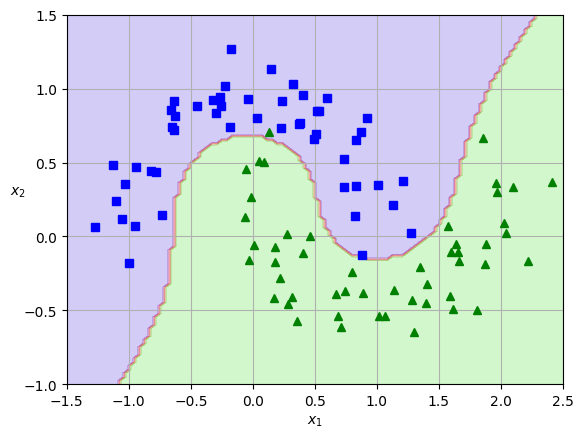

In [ ]:
def plot_dataset(X,y,axes):
  plt.plot(X[:,0][y == 0], X[:,1][y == 0], 'bs')
  plt.plot(X[:,0][y == 1], X[:,1][y == 1], 'g^')
  plt.axis(axes)
  plt.grid(True)
  plt.xlabel('$x_1$')
  plt.ylabel('$x_2$',rotation = 0)

def plot_predictions(clf,axes):
  x0s = np.linspace(axes[0],axes[1],100)
  x1s = np.linspace(axes[2],axes[3],100)
  x0,x1 = np.meshgrid(x0s,x1s)
  X = np.c_[x0.ravel(),x1.ravel()]
  y_pred = clf.predict(X).reshape(x0.shape)
  plt.contourf(x0,x1,y_pred,cmap = plt.cm.brg,alpha = 0.2)


plot_predictions(polynomial_svm_clf,[-1.5,2.5,-1,1.5])
plot_dataset(X,y,[-1.5,2.5,-1,1.5])

plt.show()